In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

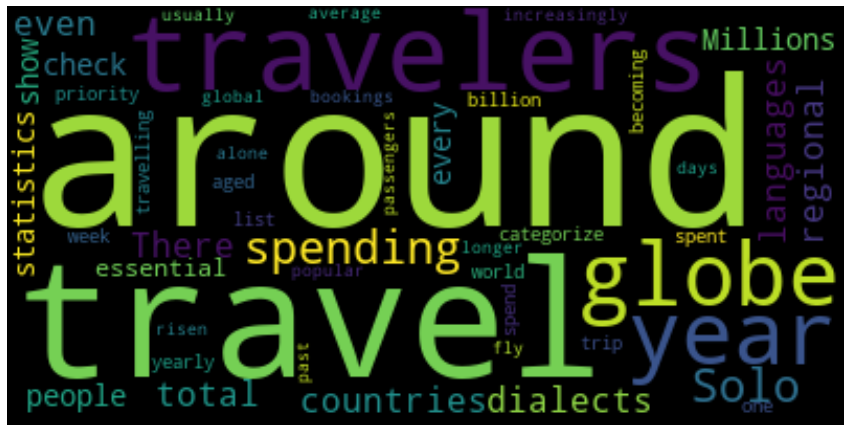

In [4]:
from wordcloud import WordCloud
plt.subplots(figsize=(15,10))
text = "There are a total of 195 countries around the globe with more than 6500 languages and even more regional dialects.Millions of people travel around the globe every year the statistics show that 1.36% of travelers check travel as essential spending and categorize it as a priority in their yearly spending list In 2017 around $1,036 billion was spent on travel around the world. 56% of travelers aged 25-34, spend $500-$1500 for a one-week trip. Solo travelling is becoming increasingly popular with about 18% of global bookings, which has risen by 7% in the past year alone. Solo travelers usually fly longer than other passengers, on average for around 19 days."

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [16]:
import pandas as pd 
# Read data from file 'filename.csv' 
data = pd.read_csv("C:\\Users\\Tanvi\\Desktop\\Notes\\Semester 2\\Predictive Analytics\\airbnb.csv") 
# Preview the first 5 lines of the loaded data 
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [17]:
print('Number of features: %s' %data.shape[1])
print('Number of examples: %s' %data.shape[0])

Number of features: 16
Number of examples: 48895


In [18]:
# Printing unique values for string columns

for col in data[['neighbourhood_group', 'neighbourhood', 'room_type']]:
    print('Unique values in column: %s' %col)
    print(data[col].unique()), '\n'

Unique values in column: neighbourhood_group
['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique values in column: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Cobble Hill'
 'Flushing' 'Boerum Hill' 'Sunnyside' 'DUMBO' 'St. George' 'Highbridge'
 'Financial District' 'Ridgewood' 'Morningside Heights' 'Jamaica'
 'Middle Village' 'NoHo' 'Ditmars Steinway' 'Flatiron District'
 'Roosevelt Island' 'Greenwich Village' 'Little Italy' 'East Flatbush'
 'Tompkinsville' 'Astoria' 'Clason 

In [21]:
#Handling null values
print('Null values in Airbnb dataset: \n')
print(data.isnull().sum())
print('\n')
print('Percentage of null values in review columns: ')
print(round(data['last_review'].isnull().sum()/len(data)*100, 2),"%")

Null values in Airbnb dataset: 

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


Percentage of null values in review columns: 


KeyError: 'last_review'

In [14]:
data.drop(['name','id','host_name','last_review'], axis=1, inplace=True)

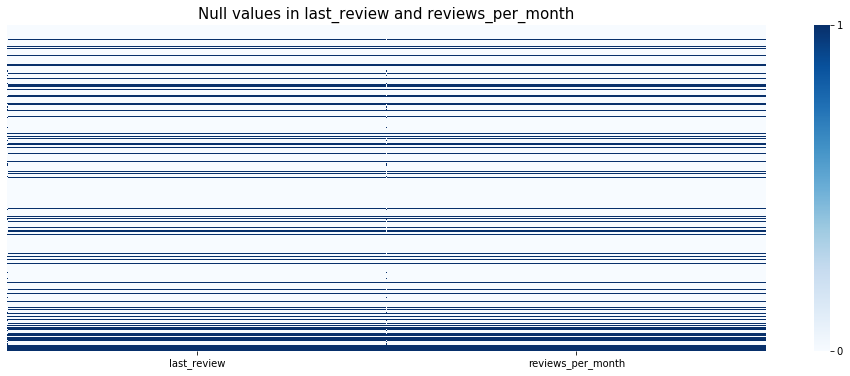

In [6]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(data[['last_review','reviews_per_month' ]].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})

In [7]:
#null values in host name
null_name = (pd.DataFrame(np.where((data['name'].isnull())))).transpose()
null_host_name = (pd.DataFrame(np.where((data['host_name'].isnull())))).transpose()

sum_null = pd.concat([null_name,null_host_name], axis=1, ignore_index=True)
sum_null.columns = ['Null rows in name', 'Null rows in host_name']
sum_null

,Null rows in name,Null rows in host_name
0,2854.0,360
1,3703.0,2700
2,5775.0,5745
3,5975.0,6075
4,6269.0,6582
5,6567.0,8163
6,6605.0,8257
7,8841.0,8852
8,11963.0,9138
9,12824.0,9817


In [20]:
# last_review column may be dropped

data.drop('last_review', axis=1, inplace=True)
# Null values for name and host_name I replace with 0. Also reviews_per_month I replace with 0

data['name'].fillna(value=0, inplace=True)
data['host_name'].fillna(value=0, inplace=True)
data['reviews_per_month'].fillna(value=0, inplace=True)
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [23]:
#categorical values:
data['room_type']=data['room_type'].factorize()[0]
data['neighbourhood_group']=data['neighbourhood_group'].factorize()[0]
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,0,Kensington,40.64749,-73.97237,0,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,1,Midtown,40.75362,-73.98377,1,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,1,Harlem,40.80902,-73.94190,0,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,0,Clinton Hill,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,1,East Harlem,40.79851,-73.94399,1,80,10,9,0.10,1,0


In [81]:
# Evaluation 1 - top 3 hosts; hosts with the biggest amount of listings

top_5_hosts = (pd.DataFrame(data.host_name.value_counts())).head(5)
top_5_hosts.columns=['Listings']
#top_5_hosts.columns=['host_name']
top_5_hosts['host_name'] = top_5_hosts.index
top_5_hosts.reset_index(drop=True, inplace=True)
top_5_hosts

,Listings,host_name
0,417,Michael
1,403,David
2,327,Sonder (NYC)
3,294,John
4,279,Alex


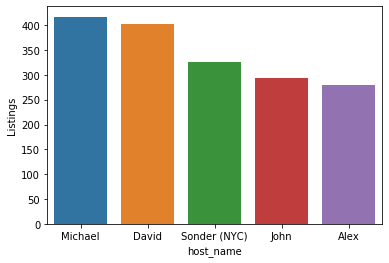

In [83]:
sns.barplot(y="Listings", x="host_name", data=top_5_hosts)
plt.show()

   Listings Neighbourhood Group
0     21661           Manhattan
1     20104            Brooklyn
2      5666              Queens


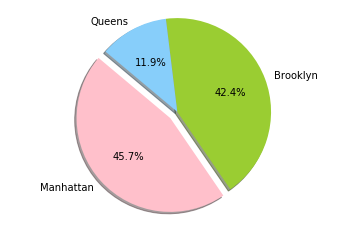

In [74]:
# Evaluation 2 - top 3 the hottest neighbourhoood groups

top_3_neigh = pd.DataFrame(data['neighbourhood_group'].value_counts().head(3))
top_3_neigh.columns=['Listings']
top_3_neigh['Neighbourhood Group'] = top_3_neigh.index
top_3_neigh.reset_index(drop=True, inplace=True)
print(top_3_neigh)
labels = 'Manhattan', 'Brooklyn', 'Queens'
sizes = [21661, 20104, 5666]
colors = ['pink', 'yellowgreen', 'lightskyblue']
explode = (0.1, 0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [19]:
# Evaluation 3 - average price, availability in year 

average_price_ava = pd.DataFrame(data[['price', 'availability_365']].describe())
average_price_ava.columns=['Price', 'Availability in a year']
average_price_ava

,Price,Availability in a year
count,48895.000000,48895.000000
mean,152.720687,112.781327
std,240.154170,131.622289
min,0.000000,0.000000
25%,69.000000,0.000000
50%,106.000000,45.000000
75%,175.000000,227.000000
max,10000.000000,365.000000


In [20]:
# Evaluation 4 - most reviewed hosts

rev_group = pd.DataFrame(data.groupby('number_of_reviews').sum()['host_id'])
most_reviewed = (rev_group.sort_values('number_of_reviews',ascending=False)).head(3)
most_reviewed.columns = ['Host ID']
most_reviewed['Number of reviews'] = most_reviewed.index
most_reviewed.reset_index(drop=True, inplace=True)
most_reviewed


,Host ID,Number of reviews
0,47621202,629
1,4734398,607
2,4734398,597


<Figure size 1080x432 with 0 Axes>

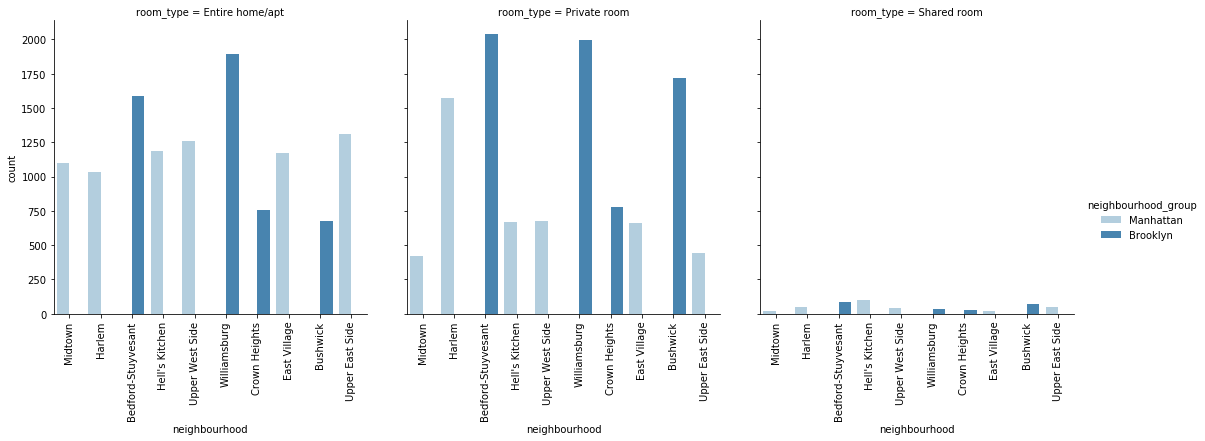

In [90]:
# Visualisation 3 - top neighbourhoods with category of room type

top_nei = data['neighbourhood'].value_counts().reset_index().head(10)
top_nei = top_nei['index'].tolist()

plt.figure(figsize=(15,6))
vis_3 = sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=data.loc[data['neighbourhood'].isin(top_nei)], kind='count', palette='Blues')
vis_3.set_xticklabels(rotation=90)

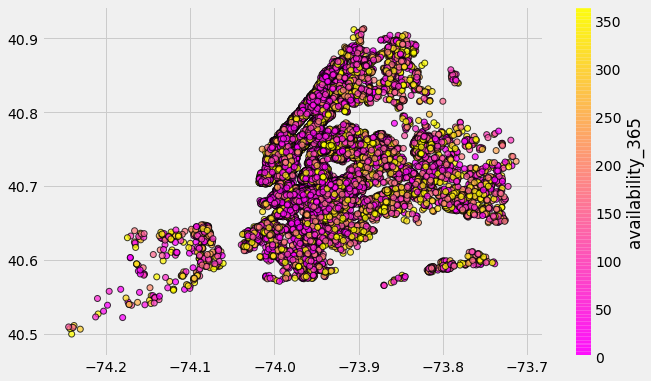

In [16]:
plt.figure(figsize=(10,6))
plt.scatter(data.longitude, data.latitude, c=data.availability_365, cmap='spring', edgecolor='black', linewidth=1, alpha=0.75)

cbar = plt.colorbar()
cbar.set_label('availability_365')

Text(0, 0.5, 'Count')

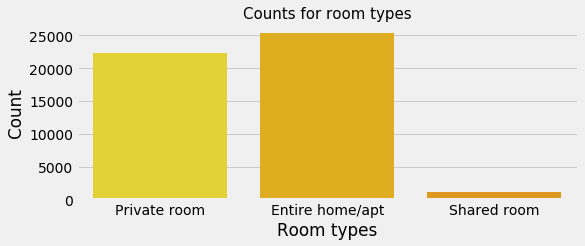

In [15]:
# Visualisation 4 - room types

plt.figure(figsize=(8,3))
sns.countplot(data=data, x='room_type', palette='Wistia')
plt.title('Counts for room types', fontsize=15)
plt.xlabel('Room types')
plt.ylabel("Count")

Text(0, 0.5, 'Availibility')

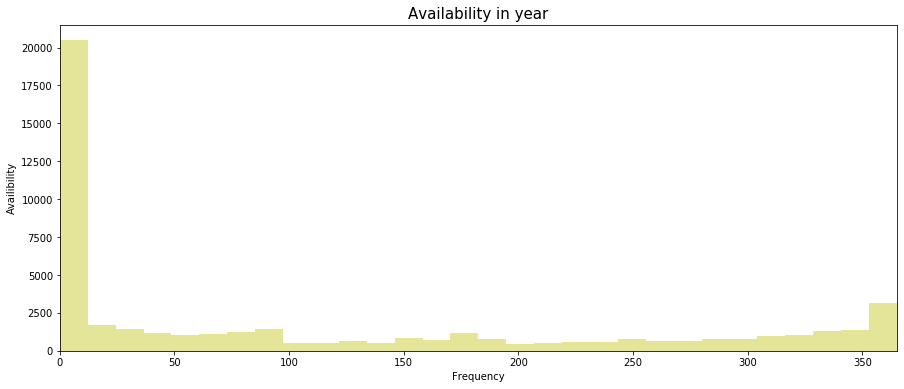

In [93]:
# Visualisation 5 - availability in year

plt.figure(figsize=(15,6))
sns.distplot(data.availability_365, kde=False,color = 'y')
plt.xlim(0,365)
plt.title('Availability in year', fontsize=15)
plt.xlabel('Frequency')
plt.ylabel("Availibility")

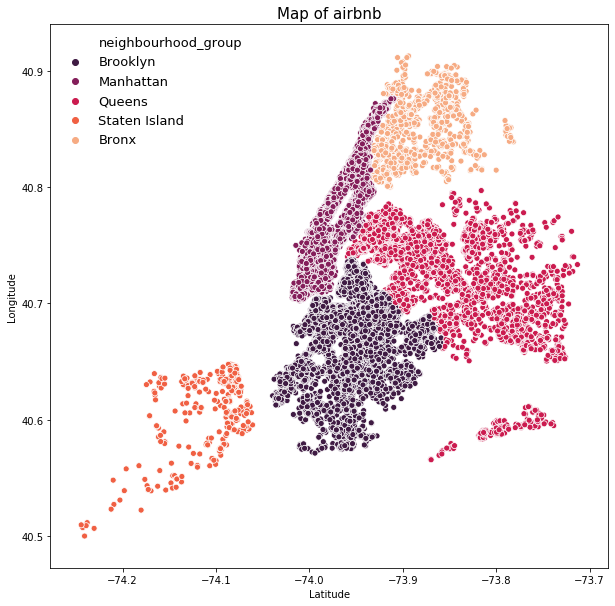

In [27]:
# Visualisation 6 - map of hosts

plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='rocket')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

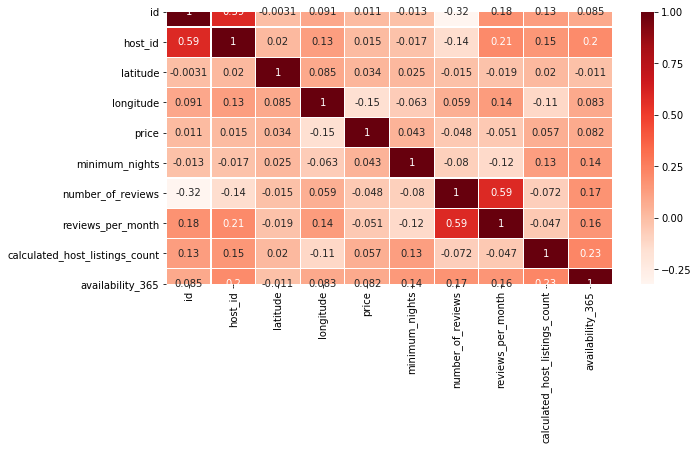

In [91]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot=True, linewidths=0.1, cmap='Reds')

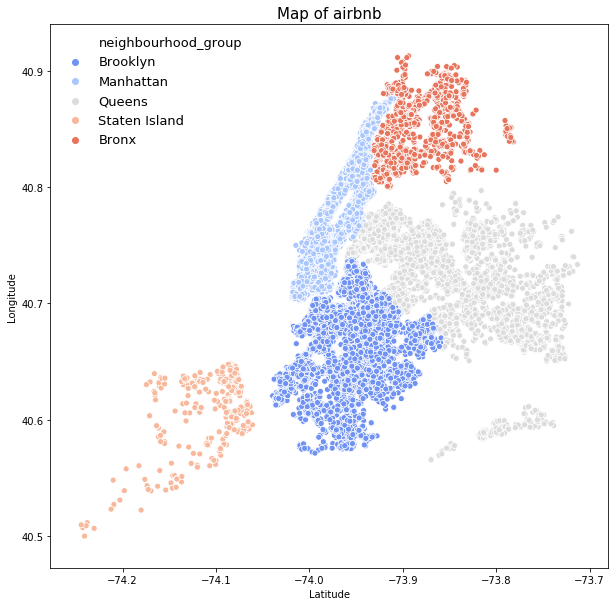

In [84]:
plt.figure(figsize=(10,10))
a = sns.scatterplot(data=data, x='longitude', y='latitude', hue='neighbourhood_group', palette='coolwarm')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)

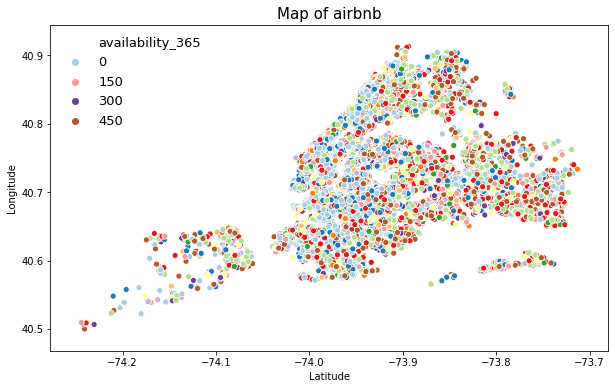

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(data.longitude,data.latitude,hue=data.availability_365,palette='Paired')
plt.title('Map of airbnb', fontsize=15)
plt.xlabel('Latitude')
plt.ylabel("Longitude")
plt.legend(frameon=False, fontsize=13)
plt.ioff()

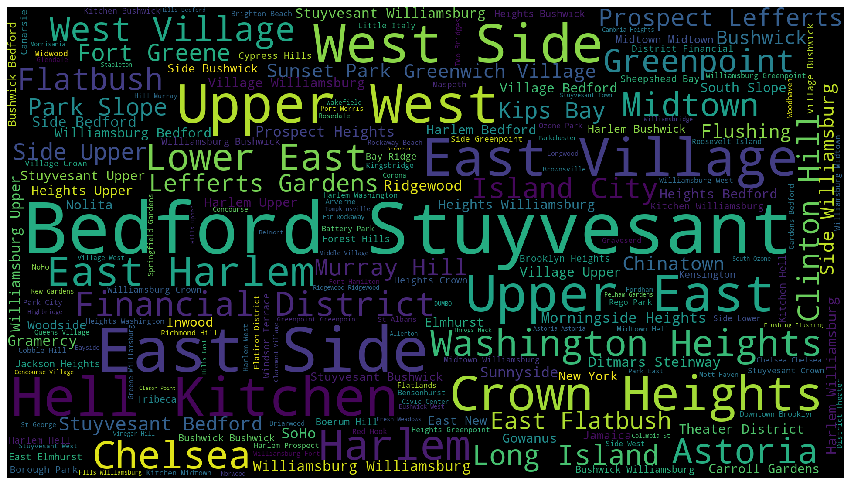

In [85]:
from wordcloud import WordCloud
plt.subplots(figsize=(15,10))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(data.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

In [34]:
pip install WordCloud

Note: you may need to restart the kernel to use updated packages.


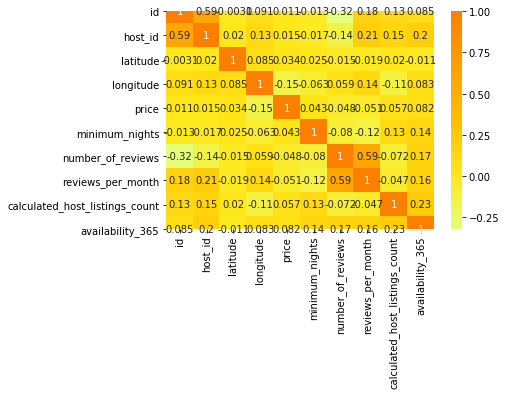

In [92]:
# correlation plot
corr = data.corr()
sns.heatmap(corr, cmap = 'Wistia', annot= True);


In [100]:
print(data.isnull().sum())

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


<Figure size 720x432 with 0 Axes>

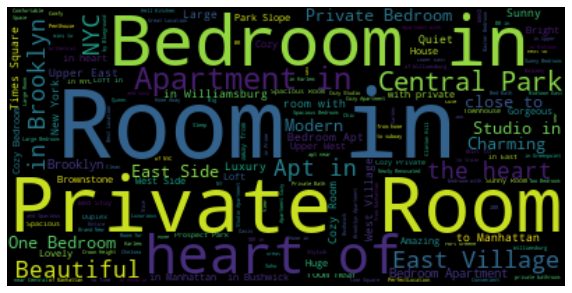

In [11]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in data.name)
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=200, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(10,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


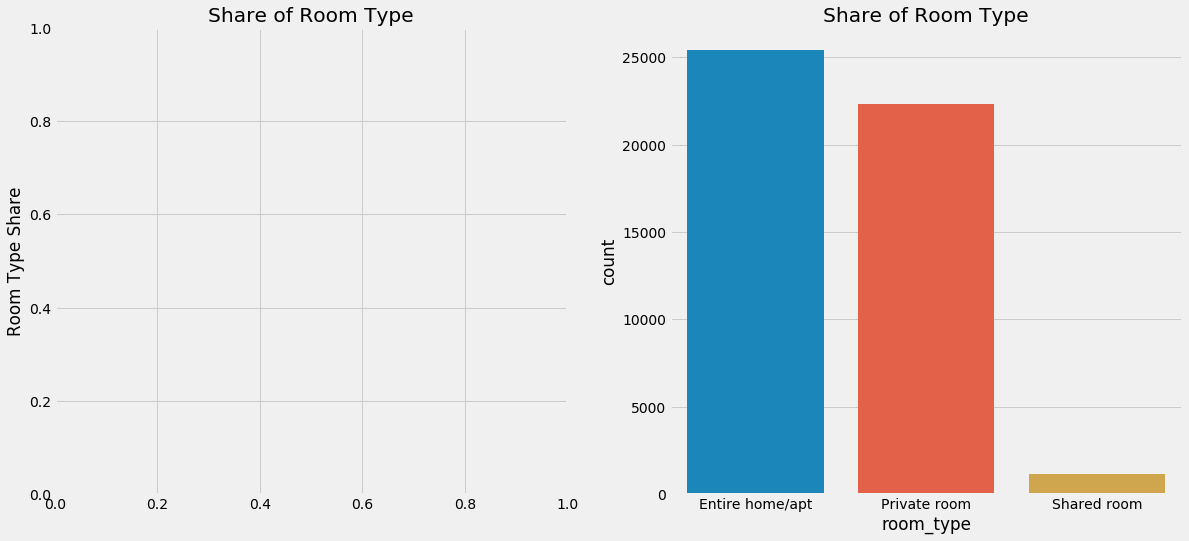

In [13]:
plt.style.use('fivethirtyeight')
f,ax=plt.subplots(1,2,figsize=(18,8))
#data['room_type'].value_counts().plot.pie(explode=[0,0.05,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Room Type')
ax[0].set_ylabel('Room Type Share')
sns.countplot('room_type',data=data,ax=ax[1],order=data['room_type'].value_counts().index)
ax[1].set_title('Share of Room Type')
plt.show()

In [ ]:
#implementing linear regression:
